In [1]:
import os
from PIL import Image
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.decomposition import PCA
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

In [4]:
c_df = pd.read_json(r"C:\Users\DELL\Downloads\final3000df.json")

In [5]:
c_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3000 entries, 0 to 2999
Columns: 1006 entries, Category_encoded to tags_PC4
dtypes: float64(1006)
memory usage: 23.0 MB


In [6]:
c_df.head(5)

,Category_encoded,Subcategory_encoded,Concept_encoded,popularity_score,features_PCA1,features_PCA2,features_PCA3,features_PCA4,features_PCA5,features_PCA6,...,features_PCA993,features_PCA994,features_PCA995,features_PCA996,features_PCA997,features_PCA998,tags_PC1,tags_PC2,tags_PC3,tags_PC4
0,6.422156,6.515767,6.500651,11.18,21.693635,-17.767733,-66.077372,35.822644,16.598883,15.136581,...,-4.153607,-4.752257,4.845143,2.445491,-4.764535,8.531533,-0.071579,-0.003371,-0.010149,-0.013795
1,6.562402,6.603636,6.572583,6.74,-13.962764,-27.769074,1.440274,73.874523,-4.843765,88.011231,...,11.222674,4.397984,2.905208,-10.160789,-1.247907,8.430422,-0.048013,0.006811,-0.022045,0.072509
2,6.428840,6.468631,6.355811,5.45,7.633656,19.903929,27.318132,-28.678703,11.081023,11.714531,...,-17.847174,-8.499386,-0.653832,-11.521739,-2.549883,6.700029,0.095578,0.186698,0.030619,0.018712
3,6.562402,6.603636,6.282670,7.05,-96.405011,48.497234,17.641654,4.975487,25.517619,-39.160556,...,-6.486359,5.100117,-3.188324,0.967698,1.470170,2.853105,0.003118,-0.039936,0.099476,-0.011788
4,6.562402,6.603636,6.282670,5.43,-102.097296,39.460716,31.280094,15.148222,24.529929,-27.140243,...,1.414302,-2.604674,4.183639,-1.003983,-3.996868,2.802942,-0.046778,0.035949,0.030837,-0.021555


In [7]:
# Splitting the data into features (X) and target variable (y)
X = c_df.drop(columns=['popularity_score'])
y = c_df['popularity_score']

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
import xgboost as xgb

In [31]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.2,
                max_depth = 6, alpha = 10, n_estimators = 10,min_child_weight=10.0)
xg_reg.fit(X_train, y_train)

XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=10.0, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10, n_jobs=None,
             num_parallel_tree=None, ...)

In [32]:
y_pred = xg_reg.predict(X_test)

In [33]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: %f" % (rmse))

RMSE: 2.542656


In [34]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate R-squared (SRC)
src = r2_score(y_test, y_pred)

# Print the metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared (SRC):", src)


Mean Squared Error: 6.465099366607853
Mean Absolute Error: 1.9593801936785378
R-squared (SRC): -0.02293564957601002


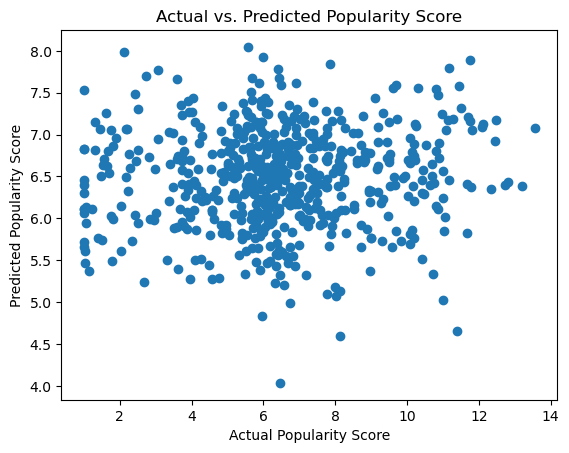

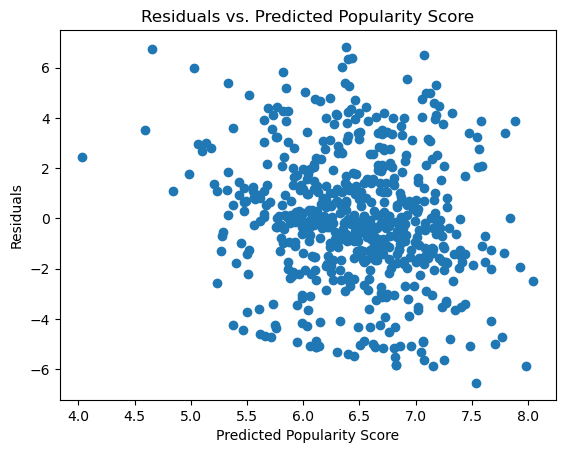

In [35]:
import matplotlib.pyplot as plt

# Plot the actual values against the predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Popularity Score')
plt.ylabel('Predicted Popularity Score')
plt.title('Actual vs. Predicted Popularity Score')
plt.show()

# Plot the residuals
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Popularity Score')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Popularity Score')
plt.show()
